# 🌳 Árvore de Regressão no **California Housing Dataset**

## 📌 Sobre o Dataset
O **California Housing Dataset** contém dados sobre moradias na Califórnia e é utilizado para prever o **valor médio de casas por distrito** com base em atributos como:

- 🏘️ **Número médio de quartos**
- 👥 **Renda média da vizinhança**
- 🧱 **Idade média das construções**
- 🌍 **Latitude e longitude**

Nosso objetivo é treinar um modelo de **Árvore de Regressão** que prevê o valor das casas com base nesses fatores.

---

## 🚀 O que o código faz?
Este projeto implementa uma **Árvore de Decisão Regressora** e inclui:

✅ Carregamento e visualização dos dados  
✅ Análise exploratória (distribuição e correlação)  
✅ Treinamento do modelo de árvore de regressão  
✅ Avaliação com múltiplas métricas: **R², RMSE, MAE, KS, Gini, Acurácia (~10%)**  
✅ Validação com Holdout e K-Fold Cross Validation  
✅ **Análise completa de resíduos** com 4 gráficos:  
&nbsp;&nbsp;&nbsp;&nbsp;• Resíduos vs Valor Real  
&nbsp;&nbsp;&nbsp;&nbsp;• Resíduos vs Valor Predito  
&nbsp;&nbsp;&nbsp;&nbsp;• Histograma com KDE  
&nbsp;&nbsp;&nbsp;&nbsp;• Boxplot dos resíduos

---

## 🛠️ Como funciona o código?
O código segue uma sequência estruturada:

1️⃣ **Carregamento dos dados**  
2️⃣ **Exploração e visualização inicial**  
3️⃣ **Divisão entre treino e teste (Holdout 80/20)**  
4️⃣ **Treinamento de uma Árvore de Regressão com hiperparâmetros controlados**  
5️⃣ **Avaliação com múltiplas métricas preditivas**  
6️⃣ **Visualização da performance com gráficos intuitivos**  
7️⃣ **Validação cruzada com K-Fold (k=10)**  
8️⃣ **Análise de resíduos completa com 4 gráficos**  

---

## 📊 Avaliação do Modelo

| **Métrica**             | **Significado**                             | **Interpretação**                                                                 |
|-------------------------|---------------------------------------------|------------------------------------------------------------------------------------|
| **R² Score**            | Poder explicativo do modelo (Holdout)       | Entre 0 e 1. Acima de 0.7 = bom, 0.5–0.7 = médio.                                  |
| **R² Médio (K-Fold)**   | Poder explicativo médio (K-Fold CV)         | Média do R² obtido em 10 validações cruzadas. Maior estabilidade = melhor modelo. |
| **MAE**                 | Erro médio absoluto                         | Quanto menor, melhor. Ideal: próximo de 0.                                         |
| **RMSE**                | Erro médio quadrático                       | Penaliza erros grandes. Deve ser menor que a média de y.                          |
| **Acurácia (~10%)**     | % de previsões dentro de ±10% do valor real | 🔹 **Acima de 80%** → Excelente: previsões altamente precisas  <br>🔹 **60% – 80%** → Boa: modelo confiável  <br>🔹 **40% – 60%** → Média: pode melhorar  <br>🔹 **20% – 40%** → Ruim: baixa precisão  <br>🔹 **Abaixo de 20%** → Muito ruim: previsões quase aleatórias |
| **Gini**                | Medida de desigualdade da previsão          | Gini = 2 × R² − 1. Acima de 0.6 é bom.                                             |
| **KS Test**             | Avalia separabilidade dos resultados        | Acima de 0.4 = boa separação, 0.2–0.4 = média, abaixo de 0.2 = fraca separação.    |

---

## 🏆 Validação do Modelo
✔ **Holdout (80/20)** – divisão simples entre treino e teste  
✔ **K-Fold Cross Validation (k=10)** – avaliação do desempenho médio em 10 subdivisões dos dados

---

## 📊 Visualizações Geradas
📌 **Gráfico Previsão vs Real** – verifica se as predições seguem a tendência dos dados reais  
📌 **Resíduos vs Valor Real** – detecta viés ou padrão nos erros  
📌 **Resíduos vs Valor Predito** – analisa dispersão e tendências de erro  
📌 **Histograma com KDE dos Resíduos** – avalia simetria, enviesamento e dispersão dos erros  
📌 **Boxplot dos Resíduos** – mostra a concentração, variabilidade e presença de outliers

---

## 🔧 Requisitos

Instale os pacotes com:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn scipy


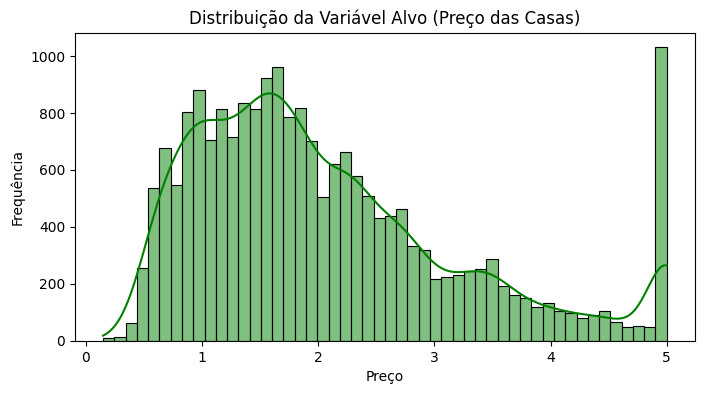

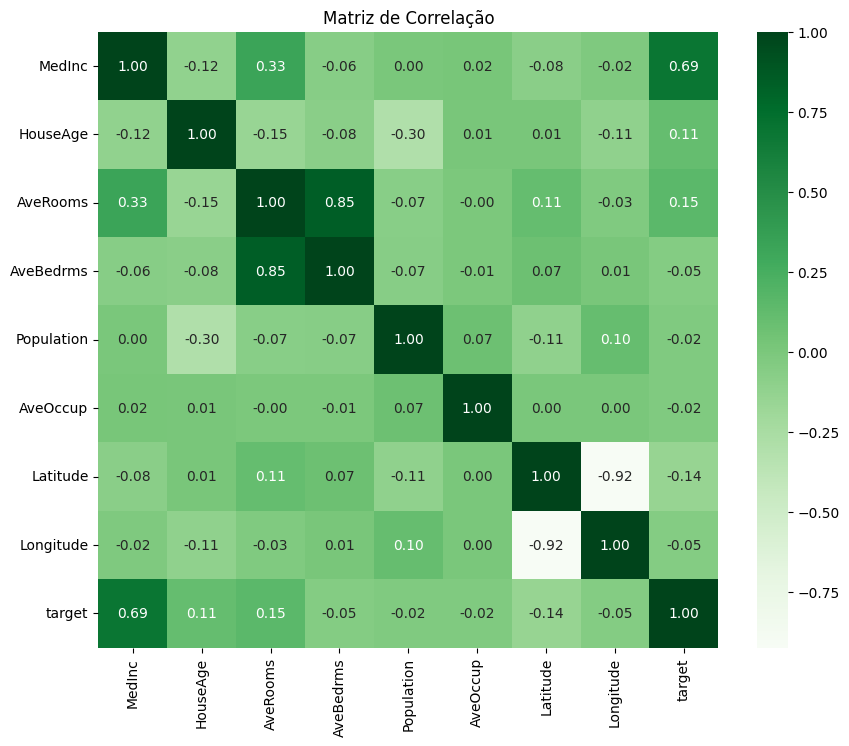

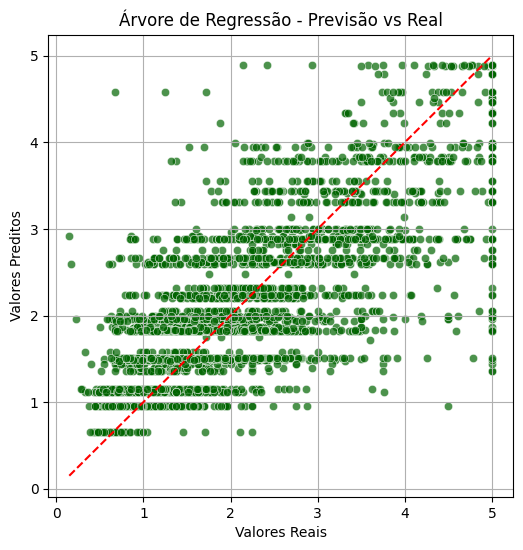

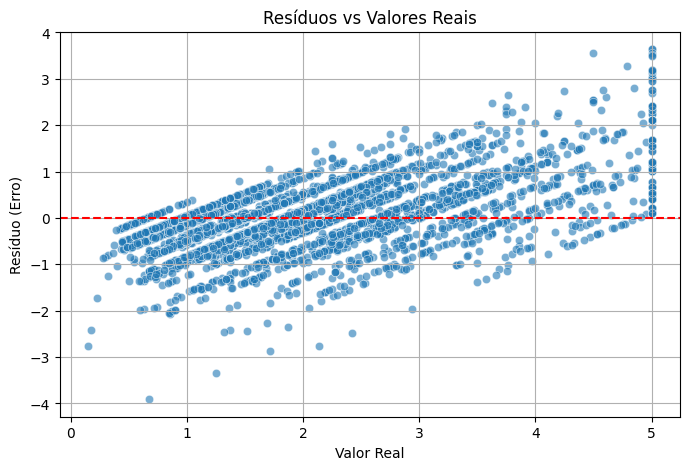

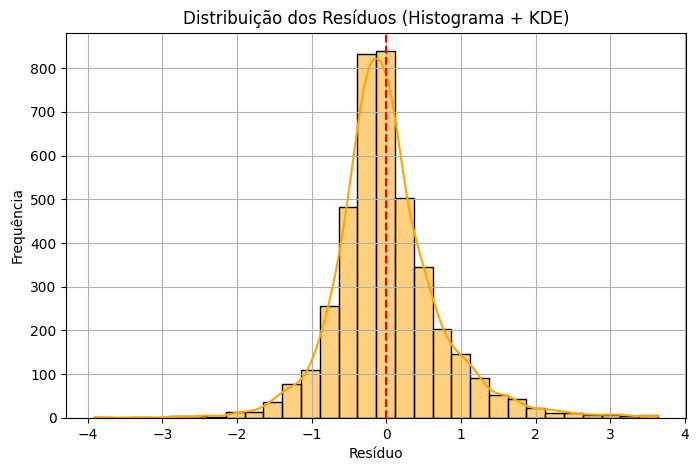

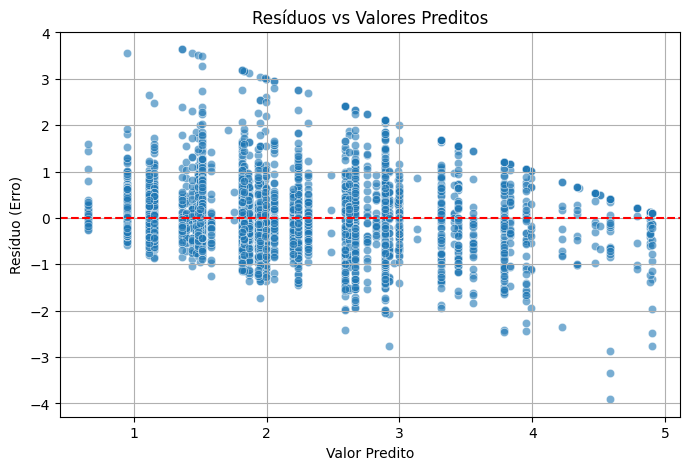

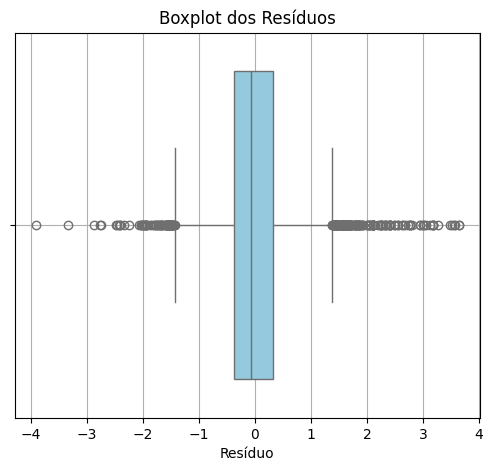


📊 Avaliação do Modelo:

             Métrica     Valor
0                MAE  0.500783
1               RMSE  0.704346
2                 R²  0.621414
3    Acurácia (~10%)  0.275436
4                 KS  0.571705
5               Gini  0.242827
6  R² Médio (K-Fold)  0.644069


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ks_2samp
import warnings

warnings.filterwarnings('ignore')

# 🔹 1. Carregar o dataset California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 🔹 2. Visualizar a distribuição da variável alvo
plt.figure(figsize=(8, 4))
sns.histplot(df['target'], bins=50, kde=True, color='green')
plt.title('Distribuição da Variável Alvo (Preço das Casas)')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# 🔹 3. Análise de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# 🔹 4. Separar os dados
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 5. Treinar o modelo de Árvore de Regressão
modelo = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, random_state=42)
modelo.fit(X_train, y_train)

# 🔹 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 🔹 7. Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
acuracia = np.mean(np.abs(y_pred - y_test) / y_test < 0.1)

# KS e Gini
y_test_median = np.median(y_test)
ks = ks_2samp(y_pred[y_test >= y_test_median], y_pred[y_test < y_test_median]).statistic
gini = 2 * r2 - 1

# 🔹 8. Gráfico Previsão vs Real
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="darkgreen")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Árvore de Regressão - Previsão vs Real")
plt.grid(True)
plt.show()

# 🔹 9. Análise de Resíduos
residuos = y_test - y_pred

# Gráfico 1: Resíduos vs Valores Reais
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Reais')
plt.xlabel('Valor Real')
plt.ylabel('Resíduo (Erro)')
plt.grid(True)
plt.show()

# Gráfico 2: Histograma + KDE dos resíduos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='orange', bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuição dos Resíduos (Histograma + KDE)')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Gráfico 3: Resíduos vs Valores Preditos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduo (Erro)')
plt.grid(True)
plt.show()

# Gráfico 4: Boxplot dos Resíduos (detecção de outliers)
plt.figure(figsize=(6, 5))
sns.boxplot(x=residuos, color='skyblue')
plt.title('Boxplot dos Resíduos')
plt.xlabel('Resíduo')
plt.grid(True)
plt.show()

# 🔹 10. K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf_scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')
r2_medio_kfold = np.mean(kf_scores)

# 🔹 11. Exibir resumo das métricas
resultado = pd.DataFrame({
    "Métrica": ["MAE", "RMSE", "R²", "Acurácia (~10%)", "KS", "Gini", "R² Médio (K-Fold)"],
    "Valor": [mae, rmse, r2, acuracia, ks, gini, r2_medio_kfold]
})

print("\n📊 Avaliação do Modelo:\n")
print(resultado)
